In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# 1.Reading the dataset to Python environment

In [2]:
#Reading Data set

In [3]:
data=pd.read_excel(r"D:\ICT Academy\Machine Learning\classification\assignment\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.Doing necessary preprocessing steps

In [4]:
#Preprocessing

In [5]:
#Checking for null values

In [6]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#we are identifying the method which we need to fill the values

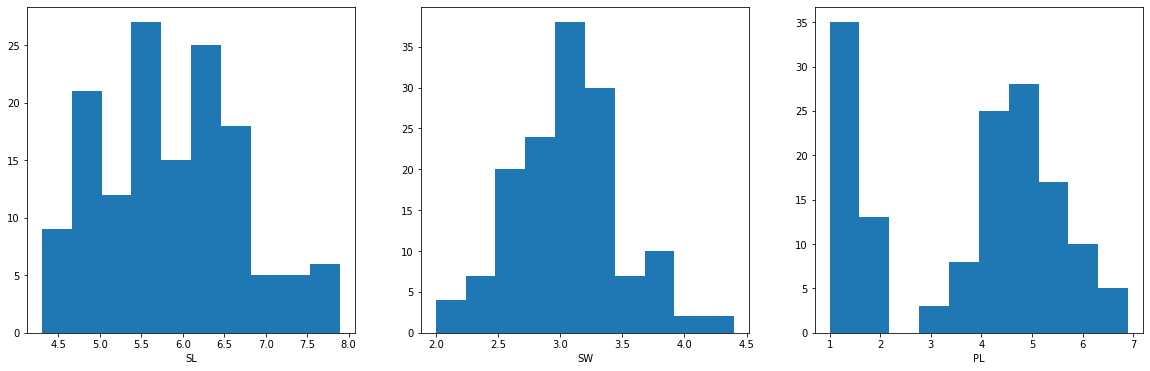

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.hist(data['SL'])
plt.xlabel('SL')
plt.subplot(1,3,2)
plt.hist(data['SW'])
plt.xlabel('SW')
plt.subplot(1,3,3)
plt.hist(data['PL'])
plt.xlabel('PL')
plt.show()

In [9]:
#we can fill all the missing values with median as all the graph are skewed

In [10]:
#filling of null values by the correspoinding values

In [11]:
for i in ['SL']:
    data[i]=data[i].fillna(data[i].median())
for i in ['SW']:
    data[i]=data[i].fillna(data[i].median())
for i in ['PL']:
    data[i]=data[i].fillna(data[i].median())
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
#checking for any outliers

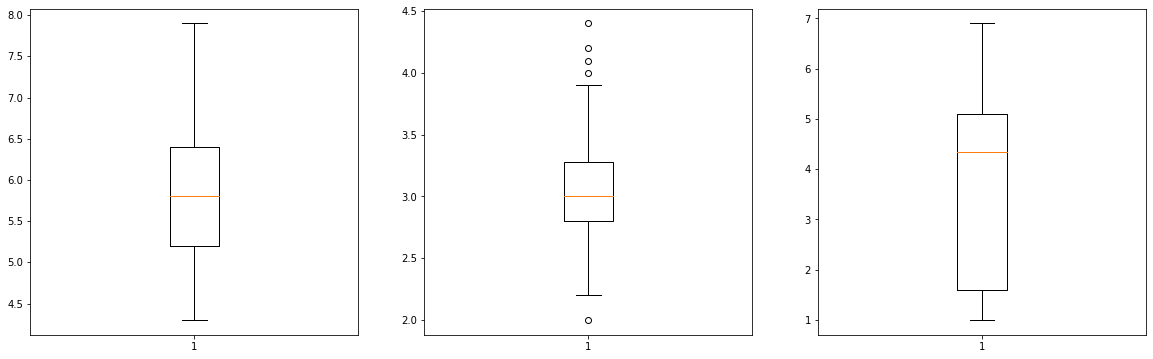

In [13]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.boxplot(data['SL'])
plt.subplot(1,3,2)
plt.boxplot(data['SW'])
plt.subplot(1,3,3)
plt.boxplot(data['PL'])
plt.show()

In [14]:
#We can identify some outliers in the SW column

In [15]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
print('IQR=',round(IQR,4))
upperlimit=Q3+1.5*IQR
lowerlimit=Q1-1.5*IQR
print("The upper limit=",round(upperlimit,5))
print("The lower limit=",round(lowerlimit,5))
outlier=[]
for i in data['SW']:
    if(i>upperlimit) or (i<lowerlimit):
        outlier.append(i)
print("The outlier values")
print(outlier)


IQR= 0.45
The upper limit= 3.925
The lower limit= 2.125
The outlier values
[4.0, 4.4, 4.1, 4.2, 2.0]


C:\Users\chris\AppData\Local\Temp\ipykernel_13780\434355148.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_13780\434355148.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\chris\AppData\Local\Temp\ipykernel_13780\434355148.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are

In [16]:
data.shape


(150, 5)

In [17]:
#as the data set is too small and the no outliers is too small we are not removing the outliers

In [18]:
data2=data
data2.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data2.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 3.Finding out the classification model which provides the best results

In [20]:
#spliting the data

In [21]:
X=data2.drop('Classification',axis=1)
Y=data2['Classification']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
#Classification models

In [25]:
#1. logistic regression 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
Lr=LogisticRegression()
Lr_model=Lr.fit(X_train,Y_train)
Y_Lr_predict=Lr_model.predict(X_test)

C:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
confusion_matrix(Y_test,Y_Lr_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [30]:
acc_lr=accuracy_score(Y_test,Y_Lr_predict)
print('The Accurcy Score of Logistic Regression without scaling=',round(acc_lr,5))

The Accurcy Score of Logistic Regression without scaling= 1.0


In [31]:
#2.KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,Y_train)
    Y_KNN_predict=Classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_KNN_predict)
    metric_k.append(acc)

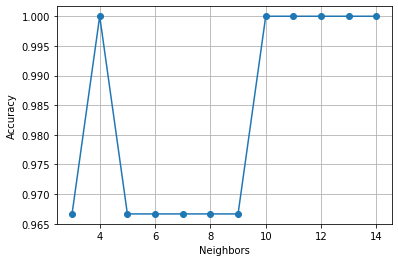

In [34]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [35]:
#selecting the negibour value which gives highest accuracy

In [36]:
Classifier=KNeighborsClassifier(n_neighbors=4)
Classifier=Classifier.fit(X_train,Y_train)
Y_KNN_predict=Classifier.predict(X_test)

In [37]:
confusion_matrix(Y_test,Y_KNN_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [38]:
acc_knn=accuracy_score(Y_test,Y_KNN_predict)
print('The Accurcy Score of KNN without scaling=',round(acc_knn,5))

The Accurcy Score of KNN without scaling= 1.0


In [39]:
#3. SVM method

In [40]:
from sklearn.svm import SVC

In [41]:
#linear Kernel

In [42]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,Y_train)
y_svm_predict_ln=clf_svm.predict(X_test)

In [43]:
confusion_matrix(Y_test,y_svm_predict_ln)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [44]:
acc_svm=accuracy_score(Y_test,y_svm_predict_ln)
print('The Accurcy Score of SVM without scaling using linear kernel=',round(acc_svm,5))

The Accurcy Score of SVM without scaling using linear kernel= 1.0


In [45]:
#rbf kernel

In [46]:
clf_svm=SVC(kernel='rbf')
clf_svm=clf_svm.fit(X_train,Y_train)
y_svm_predict_rbf=clf_svm.predict(X_test)

In [47]:
confusion_matrix(Y_test,y_svm_predict_rbf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [48]:
acc_svm2=accuracy_score(Y_test,y_svm_predict_rbf)
print('The Accurcy Score of SVM without scaling using Radial Basis Function kernel=',round(acc_svm2,5))

The Accurcy Score of SVM without scaling using Radial Basis Function kernel= 1.0


In [49]:
#4.Decision tree method

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT_clf=DecisionTreeClassifier()
DT_clf=DT_clf.fit(X_train,Y_train)
Y_DT_predict=DT_clf.predict(X_test)

In [52]:
confusion_matrix(Y_test,Y_DT_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [53]:
acc_DT=accuracy_score(Y_test,Y_DT_predict)
print('The Accurcy Score of Decision tree method=',round(acc_DT,5))

The Accurcy Score of Decision tree method= 1.0


In [54]:
#5. Random Forest Method

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RF_clf=RandomForestClassifier()
RF_clf=RF_clf.fit(X_train,Y_train)
Y_RF_clf_predict=RF_clf.predict(X_test)

In [57]:
confusion_matrix(Y_test,Y_RF_clf_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [58]:
acc_RF=accuracy_score(Y_test,Y_RF_clf_predict)
print('The Accurcy Score of Radom Forest method=',round(acc_RF,5))

The Accurcy Score of Radom Forest method= 1.0


In [59]:
#to determine whether the scaling can make any changes to the accuracy score we finding out the accuracy score after scaling

In [60]:
#repeating Logistic, KNN, SVM after StandardScaling and MinMaxscaling

In [61]:
#logistic regression

In [62]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [63]:
SS=StandardScaler()
MM=MinMaxScaler()

In [64]:
x_s=SS.fit_transform(X)
x_m=MM.fit_transform(X)

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(x_s,Y,test_size=0.2,random_state=42)

In [66]:
#logistic regression with standard scaling

In [67]:
Lr=LogisticRegression()
Lr_model_ss=Lr.fit(X_train,Y_train)
Y_Lr_predict_ss=Lr_model_ss.predict(X_test)

In [68]:
confusion_matrix(Y_test,Y_Lr_predict_ss)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [69]:
acc_lr_ss=accuracy_score(Y_test,Y_Lr_predict_ss)
print('The Accurcy Score of Logistic Regression with standard scaling=',round(acc_lr_ss,5))

The Accurcy Score of Logistic Regression with standard scaling= 0.96667


In [70]:
#KNN with standardscaling

In [71]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,Y_train)
    Y_KNN_predict_ss=Classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_KNN_predict_ss)
    metric_k.append(acc)

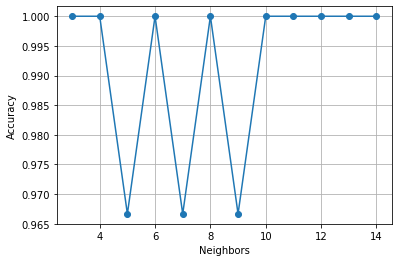

In [72]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [73]:
Classifier=KNeighborsClassifier(n_neighbors=1)
Classifier=Classifier.fit(X_train,Y_train)
Y_KNN_predict_ss=Classifier.predict(X_test)

In [74]:
confusion_matrix(Y_test,Y_KNN_predict_ss)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [75]:
acc_knn_ss=accuracy_score(Y_test,Y_KNN_predict_ss)
print('The Accurcy Score of KNN with standard scaling=',round(acc_knn_ss,5))

The Accurcy Score of KNN with standard scaling= 1.0


In [76]:
#SVM method with standard scaling

In [77]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,Y_train)
y_svm_predict_ln_ss=clf_svm.predict(X_test)

In [78]:
confusion_matrix(Y_test,y_svm_predict_ln_ss)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [79]:
acc_svm_ss=accuracy_score(Y_test,y_svm_predict_ln_ss)
print('The Accurcy Score of SVM with standard scaling=',round(acc_svm_ss,5))

The Accurcy Score of SVM with standard scaling= 0.96667


In [80]:
#repeating SVM, logistic regression and KNN after MinMaxScaling

In [81]:
#logistic regression with minmax scaling

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(x_m,Y,test_size=0.2,random_state=42)
Lr=LogisticRegression()
Lr_model_mm=Lr.fit(X_train,Y_train)
Y_Lr_predict_mm=Lr_model_mm.predict(X_test)

In [83]:
confusion_matrix(Y_test,Y_Lr_predict_mm)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [84]:
acc_lr_mm=accuracy_score(Y_test,Y_Lr_predict_mm)
print('The Accurcy Score of Logistic Regression with minmaxscaling=',round(acc_lr_mm,5))

The Accurcy Score of Logistic Regression with minmaxscaling= 0.96667


In [85]:
#KNN with min max scaling

In [86]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k)
    Classifier=Classifier.fit(X_train,Y_train)
    Y_KNN_predict_mm=Classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_KNN_predict_mm)
    metric_k.append(acc)

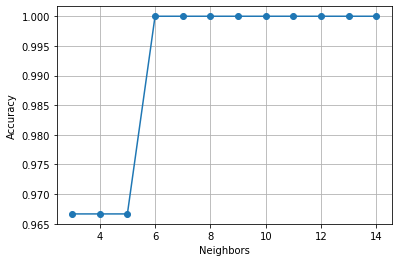

In [87]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.grid()

In [88]:
Classifier=KNeighborsClassifier(n_neighbors=7)
Classifier=Classifier.fit(X_train,Y_train)
Y_KNN_predict_mm=Classifier.predict(X_test)

In [89]:
confusion_matrix(Y_test,Y_KNN_predict_mm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [90]:
acc_knn_mm=accuracy_score(Y_test,Y_KNN_predict_mm)
print('The Accurcy Score of KNN with standard scaling=',round(acc_knn_mm,5))

The Accurcy Score of KNN with standard scaling= 1.0


In [91]:
clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,Y_train)
y_svm_predict_ln_mm=clf_svm.predict(X_test)

In [92]:
confusion_matrix(Y_test,y_svm_predict_ln_mm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [93]:
acc_svm_mm=accuracy_score(Y_test,y_svm_predict_ln_mm)
print('The Accurcy Score of SVM with standard scaling=',round(acc_svm_mm,5))

The Accurcy Score of SVM with standard scaling= 1.0


# Conclusion

On executing the all 5 different classification algorithms and executing of which Logistic regression, SVM and KNN under Standard scaling and minmax scaling conditions, we came into the insight that all models other than


1.Logistic regression after Min max scaling and Standard Scaling


2.SVM after the standard scaling


We got the Accuracy score as 1, In this two cases we got the accuracy score of 0.96667
